In [1]:
# Importing the required libraries--------------


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

%matplotlib inline


In [2]:
# Reading the dataset ---------------

data = pd.read_csv('dataBreaches.csv')
data.head()

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed records,Unnamed: 11,source name,1st source link,2nd source link,ID
0,visualisation here: https://informationisbeaut...,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",year story broke,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN,NaN
1,Plex,NaN,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1,NaN,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418.0
2,Twitter,NaN,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419.0
3,Shanghai Police,NaN,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5,"""one billion""",NaN,The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420.0
4,"City of Amagasaki, Japan",NaN,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3,NaN,NaN,BBC,https://www.bbc.co.uk/news/world-asia-61921222,NaN,421.0


In [3]:
# Dropping the first row because it contains ununsual data ---------------

data.drop([0] , axis = 0 , inplace = True)

In [4]:
# Dropping the unrequired data columns ------------

data.drop(columns = ['Unnamed: 11','2nd source link','1st source link'], axis= 1 , inplace =True)

In [5]:
# renaming the column names  because many have trailing spaces which make difficulty in further stages ------------
data = data.rename(columns = {
    'organisation' : 'Organization',
    'alternative name': 'Alternative_name',
    'records lost' : 'Records_lost',
    'year   ' : 'Year', 'date': 'Date','story' : 'Story' , 
    'sector' : 'Sector' ,'method' : 'Method' ,'interesting story' : 'Interesting_story' ,
    'data sensitivity' : 'Data_sensitivity' ,'displayed records' : 'Displayed_records' ,'source name': 'Source_name',
})

In [6]:
data.head()

,Organization,Alternative_name,Records_lost,Year,Date,Story,Sector,Method,Interesting_story,Data_sensitivity,Displayed_records,Source_name,ID
1,Plex,NaN,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,NaN,1,NaN,Ars technica,418.0
2,Twitter,NaN,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2,NaN,Bleeping Computer,419.0
3,Shanghai Police,NaN,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,NaN,5,"""one billion""",The Register,420.0
4,"City of Amagasaki, Japan",NaN,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,NaN,3,NaN,BBC,421.0
5,Dubai Real Estate Leak,NaN,"800,000",2022,May 2022,"Data leak exposes how criminals, officials, an...",financial,inside job,y,1,NaN,E24,417.0


In [7]:
# --------- Getting the summary of our dataset ------------

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 1 to 417
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Organization       417 non-null    object 
 1   Alternative_name   144 non-null    object 
 2   Records_lost       417 non-null    object 
 3   Year               417 non-null    object 
 4   Date               417 non-null    object 
 5   Story              411 non-null    object 
 6   Sector             417 non-null    object 
 7   Method             417 non-null    object 
 8   Interesting_story  85 non-null     object 
 9   Data_sensitivity   416 non-null    object 
 10  Displayed_records  74 non-null     object 
 11  Source_name        417 non-null    object 
 12  ID                 417 non-null    float64
dtypes: float64(1), object(12)
memory usage: 42.5+ KB


In [8]:
#  Getting how many rows and columns we have -------------

data.shape

(417, 13)

In [9]:
#  getting some stats related to our data -------------

data.describe()

,ID
count,417.000000
mean,210.529976
std,121.231936
min,2.000000
25%,106.000000
50%,210.000000
75%,315.000000
max,421.000000


# Data preprocessing ----------

In [10]:
# check for null values 

data.isna().sum()

Organization           0
Alternative_name     273
Records_lost           0
Year                   0
Date                   0
Story                  6
Sector                 0
Method                 0
Interesting_story    332
Data_sensitivity       1
Displayed_records    343
Source_name            0
ID                     0
dtype: int64

In [11]:
#  Filling null values with 0 

data.fillna(0, inplace = True)
data.isna().sum()

Organization         0
Alternative_name     0
Records_lost         0
Year                 0
Date                 0
Story                0
Sector               0
Method               0
Interesting_story    0
Data_sensitivity     0
Displayed_records    0
Source_name          0
ID                   0
dtype: int64

In [12]:
data.head()

,Organization,Alternative_name,Records_lost,Year,Date,Story,Sector,Method,Interesting_story,Data_sensitivity,Displayed_records,Source_name,ID
1,Plex,0,"15,000,000",2022,Aug 2022,"Intruders access password data, usernames, and...",web,hacked,0,1,0,Ars technica,418.0
2,Twitter,0,"5,400,000",2021,Dec 2021,Zero day vulnerability allowed a threat actor ...,web,hacked,0,2,0,Bleeping Computer,419.0
3,Shanghai Police,0,"500,000,000",2022,Jul 2022,A database containing records of over a billio...,financial,hacked,0,5,"""one billion""",The Register,420.0
4,"City of Amagasaki, Japan",0,"500,000",2022,Jun 2022,An unnamed government official lost his bag af...,government,oops!,0,3,0,BBC,421.0
5,Dubai Real Estate Leak,0,"800,000",2022,May 2022,"Data leak exposes how criminals, officials, an...",financial,inside job,y,1,0,E24,417.0


In [13]:
# No. of different organizations who lost lost their sensitive or any kind of data

data.Organization.nunique()

395

In [14]:
#  The companies which losts data are : 
data.Organization.unique()

array(['Plex', 'Twitter', 'Shanghai Police', 'City of Amagasaki, Japan',
       'Dubai Real Estate Leak', 'Heroku', 'Mailchimp', 'PayHere', 'CDEK',
       'Washington State Dpt of Licensing', 'Red Cross', 'Open Subtitles',
       'FlexBooker', 'LINE Pay', 'Robinhood', 'GoDaddy', 'Travelio',
       'Acer', 'Brewdog', 'Nvidia', 'Okta', 'Experian SA',
       'Royal Enfield', 'Avvo', 'Aimware', 'Twitch', 'Syniverse',
       'Pandora Papers', 'Neiman Marcus', 'Epik', 'Thailand visitors',
       'T-Mobile ', 'Contact tracing data', 'Estonian gov', 'Guntrader',
       'Linkedin', 'VW', 'MacDonalds', 'Air India', 'Omiai dating app',
       'Amazon Reviews', 'Peloton', 'Digital Ocean', 'Park Mobile',
       'Ubiquiti', 'Meet Mindful', 'Experian Brazil', 'Gab',
       'Star Alliance', 'Facebook', 'Ledger', 'T-mobile',
       'The Hospital Group', 'SolarWinds', 'Ho Mobile', 'Spotify',
       'Drizly', 'GEDmatch', 'Call of Duty / Activision', 'Zhenhua',
       'Cense AI', 'Nintendo', 'Pakistani mo

In [15]:
#  Checking datatypes of each column of our dataset ------

data.dtypes

Organization          object
Alternative_name      object
Records_lost          object
Year                  object
Date                  object
Story                 object
Sector                object
Method                object
Interesting_story     object
Data_sensitivity      object
Displayed_records     object
Source_name           object
ID                   float64
dtype: object

In [16]:
#  Converting the datatype from object to integer ---------

data.Records_lost = data.Records_lost.str.replace(',', '').astype(int)
data.Data_sensitivity = data.Data_sensitivity.astype(int)



In [17]:
#  Dropping the column / features which are not required 

data.drop(['Date','Interesting_story'], axis = 1 , inplace =True)

In [18]:
data.head()

,Organization,Alternative_name,Records_lost,Year,Story,Sector,Method,Data_sensitivity,Displayed_records,Source_name,ID
1,Plex,0,15000000,2022,"Intruders access password data, usernames, and...",web,hacked,1,0,Ars technica,418.0
2,Twitter,0,5400000,2021,Zero day vulnerability allowed a threat actor ...,web,hacked,2,0,Bleeping Computer,419.0
3,Shanghai Police,0,500000000,2022,A database containing records of over a billio...,financial,hacked,5,"""one billion""",The Register,420.0
4,"City of Amagasaki, Japan",0,500000,2022,An unnamed government official lost his bag af...,government,oops!,3,0,BBC,421.0
5,Dubai Real Estate Leak,0,800000,2022,"Data leak exposes how criminals, officials, an...",financial,inside job,1,0,E24,417.0


In [19]:
#  The 'one billion' making my work hard , had to convert it into numeric for that i have to get its index and changes it
    
#      because its need to be numeric but its in a string format of a numeric column 

data[data.Displayed_records == '"one billion"'].index[0]

3

In [20]:
data['Displayed_records'][3] = 1000000

C:\Users\DELL\AppData\Local\Temp\ipykernel_7464\1067361376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Displayed_records'][3] = 1000000


In [21]:
data.Displayed_records = pd.to_numeric(data.Displayed_records , errors = 'coerce').astype(float)

# Data Visualization -----------

In [22]:
data.Method.unique()

array(['hacked', 'oops!', 'inside job', 'poor security ', 'poor security',
       'lost device', 'lost device '], dtype=object)

<AxesSubplot: >

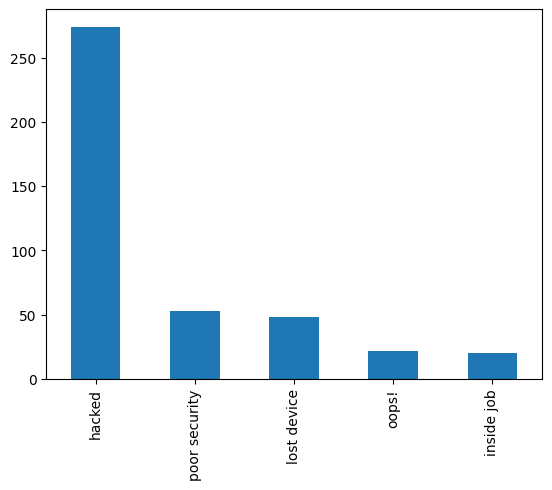

In [23]:
# Different method by which company loses data 
neww = {
    'Method' : {'poor security ' : 'poor security', 'lost device ' : 'lost device'}
}
 
# having same ans but some have trailing spaces need to be removed !! 
data.replace(neww , inplace = True)


data.Method.value_counts().plot(kind = 'bar')

Summary : Mostly the companies lost their data by getting hacked by someone or some hackers organizations 


<AxesSubplot: xlabel='Records_lost', ylabel='Organization'>

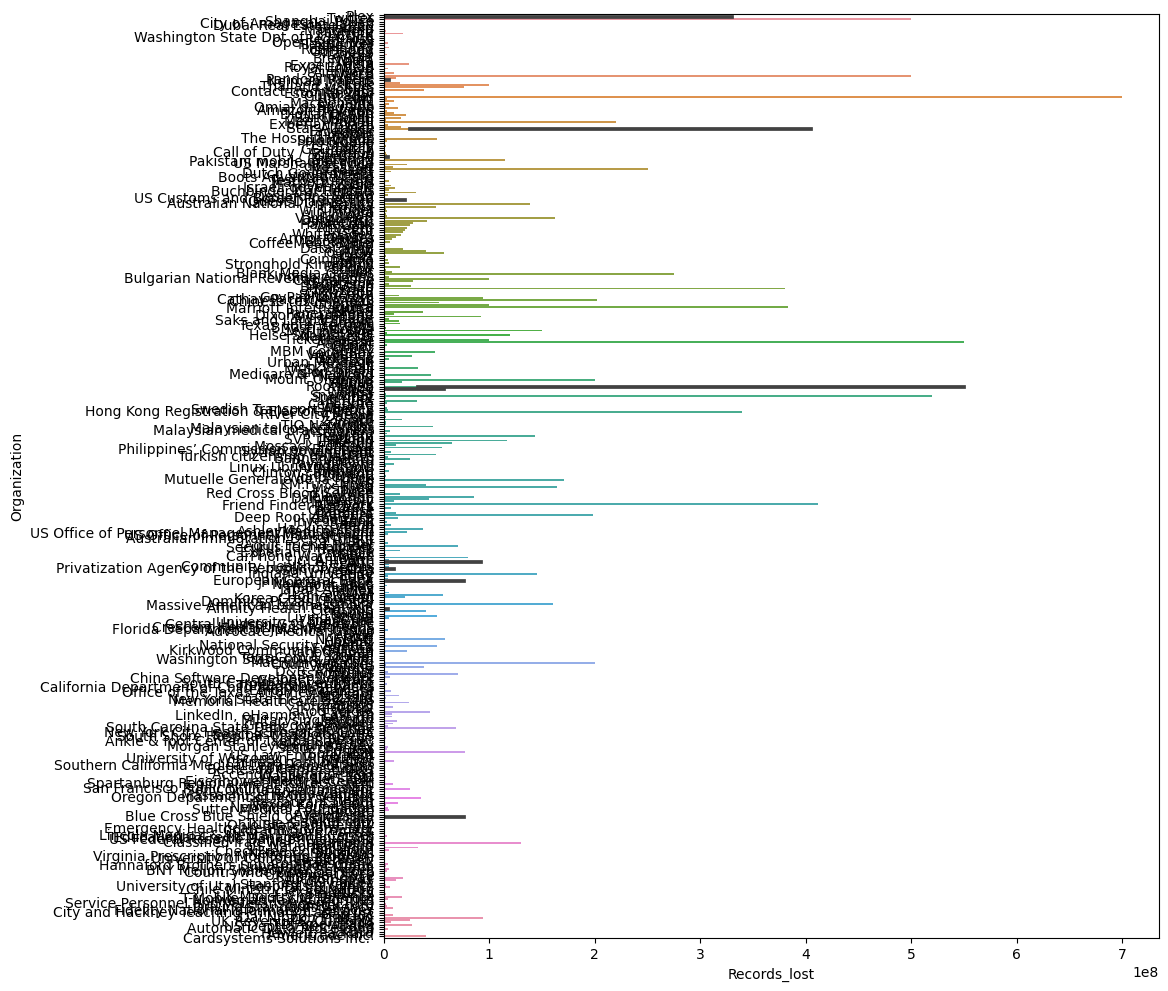

In [24]:
# there are alot of companies so difficult to plot this graph :: so selecting some companies which lost the data in large amounts
#             in next tab
plt.figure(figsize = (10,12))
sns.barplot( x  = 'Records_lost' , y = 'Organization' , data = data)


In [25]:
#  getting the median of column Records_lost 

medd = np.median(data.Records_lost)

medd

3100000.0

In [26]:
# The max number of account lost by a company :---

maxx = max(data.Records_lost)
data[data.Records_lost == 700000000]          

# so here we see that massive or in largest amount , the data is losen by linkedin Company !

,Organization,Alternative_name,Records_lost,Year,Story,Sector,Method,Data_sensitivity,Displayed_records,Source_name,ID
36,Linkedin,0,700000000,2021,The hacker appears to have misused the officia...,web,hacked,1,NaN,9 to 5 mac,385.0


In [27]:
# getting those companies which lost data in largest amount among all !  dataLoss size > 50000000


data2 = data[data.Records_lost > 50000000]

data2.shape

(57, 11)

In [28]:
data2.head()

,Organization,Alternative_name,Records_lost,Year,Story,Sector,Method,Data_sensitivity,Displayed_records,Source_name,ID
3,Shanghai Police,0,500000000,2022,A database containing records of over a billio...,financial,hacked,5,1000000.0,The Register,420.0
27,Syniverse,0,500000000,2021,"""A company that is a critical part of the glob...",telecoms,hacked,4,NaN,Vice,394.0
31,Thailand visitors,0,100000000,2021,Any foreigner who has travelled to Thailand in...,government,poor security,2,NaN,South China Morning Post,390.0
32,T-Mobile,0,76000000,2021,"Exposed the names, date of birth, Social Secur...",telecoms,hacked,3,0.0,Krebson Security,389.0
36,Linkedin,0,700000000,2021,The hacker appears to have misused the officia...,web,hacked,1,NaN,9 to 5 mac,385.0


<AxesSubplot: xlabel='Records_lost', ylabel='Organization'>

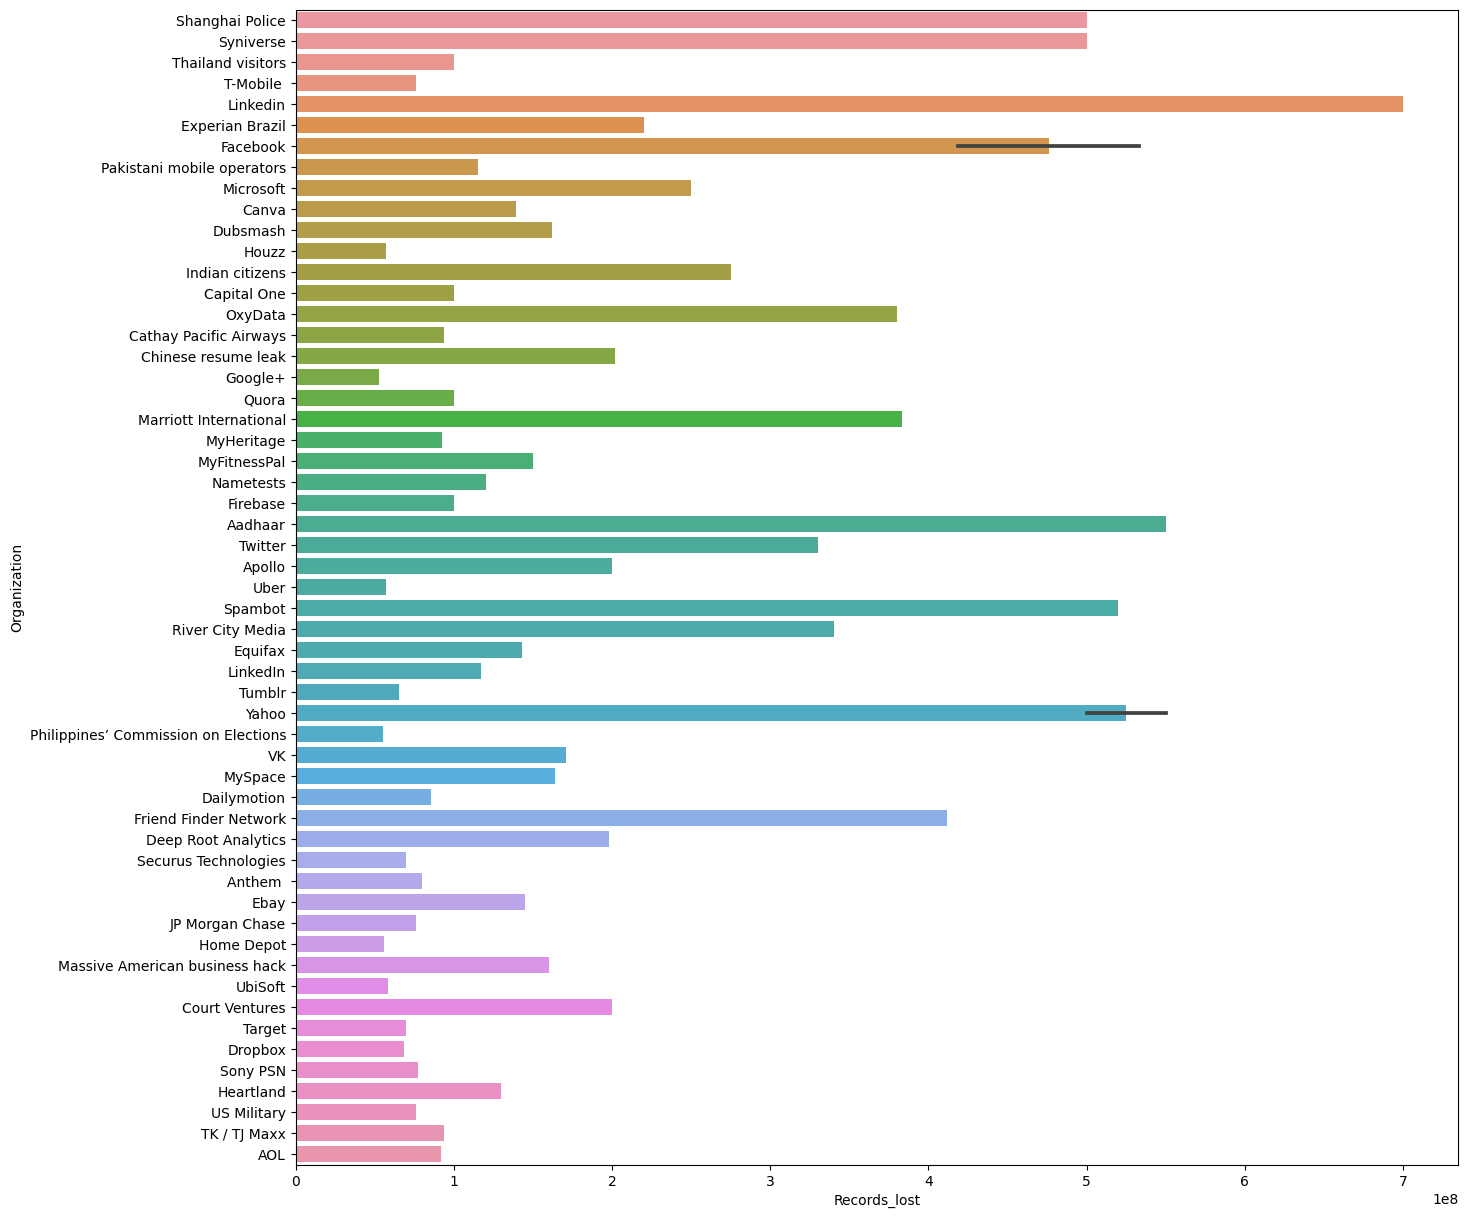

In [29]:
# lets plot this on a graph 
plt.figure(figsize = (15,15))
sns.barplot( x  = 'Records_lost' , y = 'Organization' , data = data2  )

-- summary : Acc. to graph massive amount of data is lost by :
                        1. Linkedin 
                        2. Aadhar
                        3. Yahoo 
                        4. Facebook and spambot

In [30]:
data.head()

,Organization,Alternative_name,Records_lost,Year,Story,Sector,Method,Data_sensitivity,Displayed_records,Source_name,ID
1,Plex,0,15000000,2022,"Intruders access password data, usernames, and...",web,hacked,1,0.0,Ars technica,418.0
2,Twitter,0,5400000,2021,Zero day vulnerability allowed a threat actor ...,web,hacked,2,0.0,Bleeping Computer,419.0
3,Shanghai Police,0,500000000,2022,A database containing records of over a billio...,financial,hacked,5,1000000.0,The Register,420.0
4,"City of Amagasaki, Japan",0,500000,2022,An unnamed government official lost his bag af...,government,oops!,3,0.0,BBC,421.0
5,Dubai Real Estate Leak,0,800000,2022,"Data leak exposes how criminals, officials, an...",financial,inside job,1,0.0,E24,417.0


In [31]:
# we have two similar category in our data 'web ' and 'web'  have to replace or combine them in a single entity 'web'

#  having trailing spaces need to be removed 
rr = {
    'Sector' : {'web ' : 'web'}
}

data.replace(rr,inplace = True )



In [32]:
data.Sector.unique()

array(['web', 'financial', 'government', 'tech', 'retail', 'NGO', 'misc',
       'transport', 'legal', 'gaming', 'telecoms', 'app', 'finance',
       'health ', 'misc, health', 'tech, health', 'academic', 'tech, app',
       'web, tech', 'tech, web', 'government, health', 'web, military',
       'tech, retail', 'military', 'military, health', 'web, gaming',
       'government, military'], dtype=object)

<AxesSubplot: >

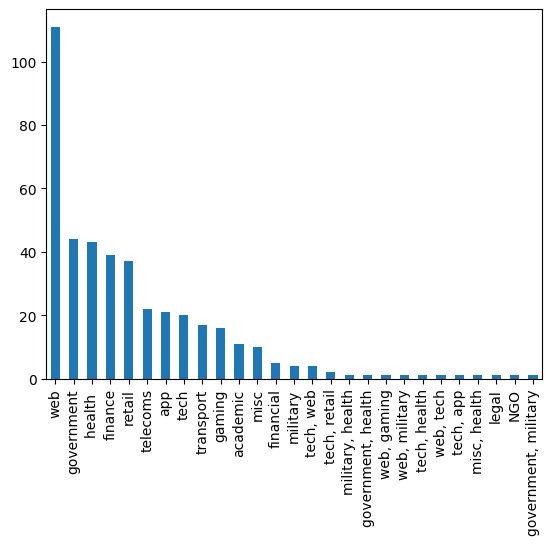

In [33]:
data.Sector.value_counts().plot(kind = 'bar')

summary : As we saw that most of the companies which are in the sector of web mostly loses their data , so they need to increase their web security from getting hacked !!


<AxesSubplot: xlabel='Records_lost', ylabel='Organization'>

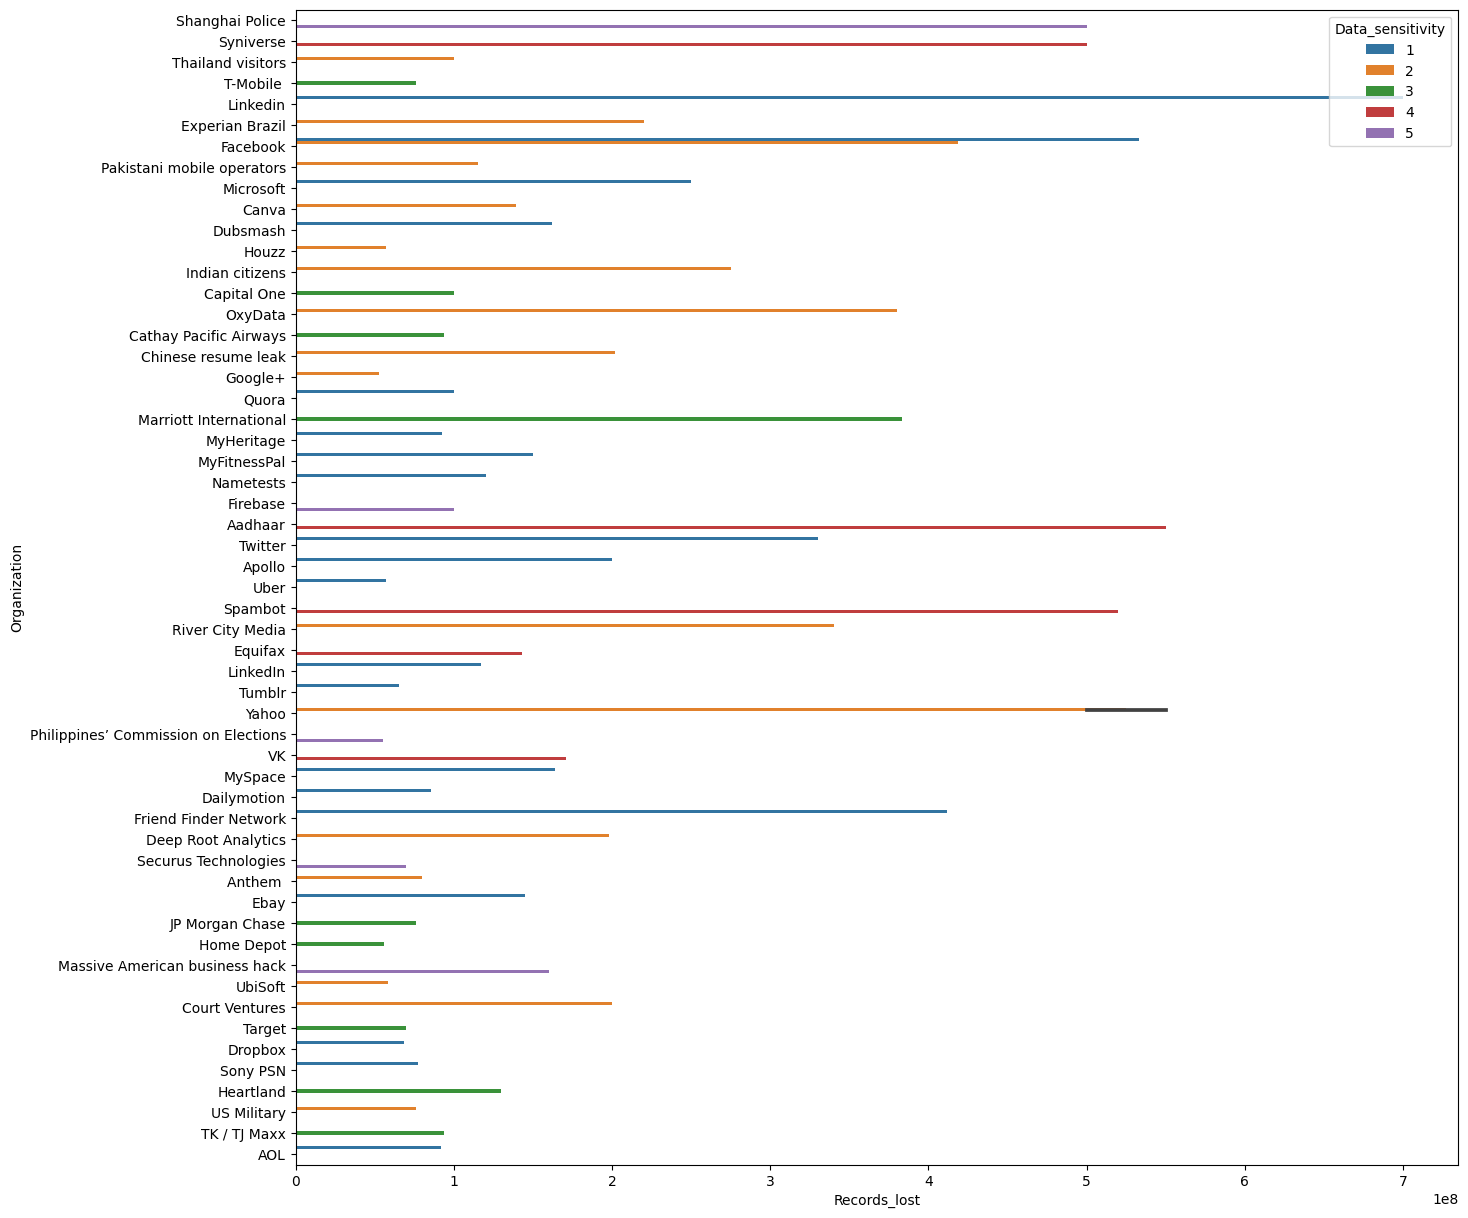

In [34]:
# data loss of a company based on sensitivity :

#  we have lot of companies so its difficult to plot for 417 companies together so I selected some companies based on amount of data loss

plt.figure(figsize = (15,15))
sns.barplot( x  = 'Records_lost' , y = 'Organization' , data = data2 , hue = 'Data_sensitivity' )

Summary : As we see the more amount of data is lost by linkedin but that's the least sensitive data 

        - the most sensitive data is lost by shanghai police 
                then syniverse , aadhar and spambot 

<AxesSubplot: xlabel='Year', ylabel='Records_lost'>

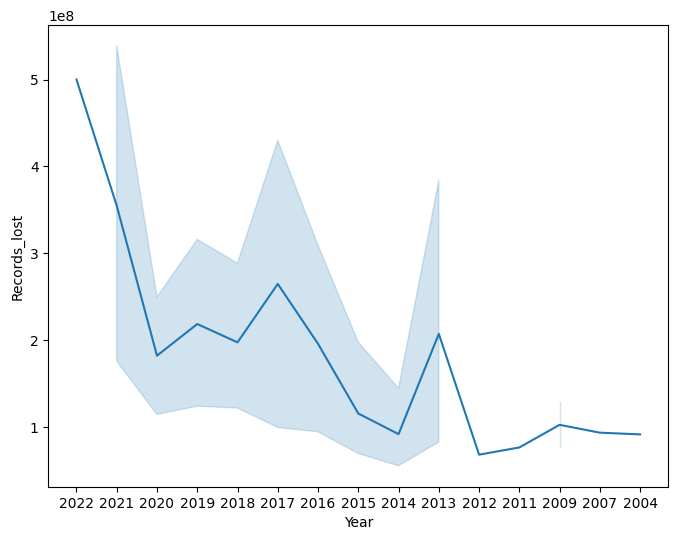

In [35]:
plt.figure(figsize = (8,6))
sns.lineplot(x= 'Year' , y = 'Records_lost' , data = data2)

Summary : The data in previous year is in very less amount can easily be handled in excel sheets or registers 
    
        - but in today's year or recent years the amount of data is massively increasing day by day and we need diff diff tools to handle them , As the amount of data increases the chances of loss of data also increases because it become diff to manage and handle the large amount of data together and hackers find ways (vulnerability)  and exploit it and make harms to the companies and their customers 